# Quantifying Shakespeare
Analyzing the frequencies of differrent letters in Shakepeare's work.

(Data from: bit.ly/shakespeare-txt)

In this notebook, we will:
1. Read all of Shakespeare's works into a list of strings
2. Count the frequencies of letters used
3. Visualize the frequencies with a bar graph

## Reading Lines


In [4]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read a text file into a list of strings for each line."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        # strip leading and tailing whitespaces " a " -> "a"
        line = line.strip()
        # make every character lowercase
        line = line.lower()
        lines.append(line)
    file_handle.close()
    return lines

shakespeare_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakespeare_lines))

124456


In [5]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutates counts by increasing the value stored at key by 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

In [6]:
d: dict[str, int] = {}
tally(d, "a")
print(d)
tally(d, "a")
print(d)
tally(d, "b")
print(d)


{'a': 1}
{'a': 2}
{'a': 2, 'b': 1}


In [8]:
def count_letters(lines: list[str]) -> dict[str, int]: 
    """Counts the frequencies of all letters in a list of strings."""
    counts: dict[str, int] = {}
    for line in lines: #line is a string
        for letter in line:
            if line.isalpha():
                tally(counts, letter)
    return counts

shakes_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakes_letters)

{'s': 117, 'h': 50, 'a': 91, 'k': 7, 'e': 276, 'p': 44, 'r': 95, 'n': 138, 'd': 36, 'x': 99, 'i': 134, 't': 173, 'u': 113, 'l': 60, 'o': 93, 'g': 35, 'c': 37, 'm': 33, 'b': 25, 'w': 12, 'y': 10, 'v': 12, 'f': 3, 'j': 3, 'z': 1, 'q': 1}


# Sorting Dictionaties

In [12]:
# Get list of items of a dictionary
print(shakes_letters)

#Turns dictionary into list
shakes_letters_list = list(shakes_letters.items()) 
print(shakes_letters_list)

#Sorts items of list
shakes_letters_list = sorted(shakes_letters_list)
print(shakes_letters_list) 

#Turns sorted list into dictionary
shakes_letters_sorted = dict(shakes_letters_list)
shakes_letters_sorted



{'s': 117, 'h': 50, 'a': 91, 'k': 7, 'e': 276, 'p': 44, 'r': 95, 'n': 138, 'd': 36, 'x': 99, 'i': 134, 't': 173, 'u': 113, 'l': 60, 'o': 93, 'g': 35, 'c': 37, 'm': 33, 'b': 25, 'w': 12, 'y': 10, 'v': 12, 'f': 3, 'j': 3, 'z': 1, 'q': 1}
[('s', 117), ('h', 50), ('a', 91), ('k', 7), ('e', 276), ('p', 44), ('r', 95), ('n', 138), ('d', 36), ('x', 99), ('i', 134), ('t', 173), ('u', 113), ('l', 60), ('o', 93), ('g', 35), ('c', 37), ('m', 33), ('b', 25), ('w', 12), ('y', 10), ('v', 12), ('f', 3), ('j', 3), ('z', 1), ('q', 1)]
[('a', 91), ('b', 25), ('c', 37), ('d', 36), ('e', 276), ('f', 3), ('g', 35), ('h', 50), ('i', 134), ('j', 3), ('k', 7), ('l', 60), ('m', 33), ('n', 138), ('o', 93), ('p', 44), ('q', 1), ('r', 95), ('s', 117), ('t', 173), ('u', 113), ('v', 12), ('w', 12), ('x', 99), ('y', 10), ('z', 1)]


{'a': 91,
 'b': 25,
 'c': 37,
 'd': 36,
 'e': 276,
 'f': 3,
 'g': 35,
 'h': 50,
 'i': 134,
 'j': 3,
 'k': 7,
 'l': 60,
 'm': 33,
 'n': 138,
 'o': 93,
 'p': 44,
 'q': 1,
 'r': 95,
 's': 117,
 't': 173,
 'u': 113,
 'v': 12,
 'w': 12,
 'x': 99,
 'y': 10,
 'z': 1}

<BarContainer object of 26 artists>

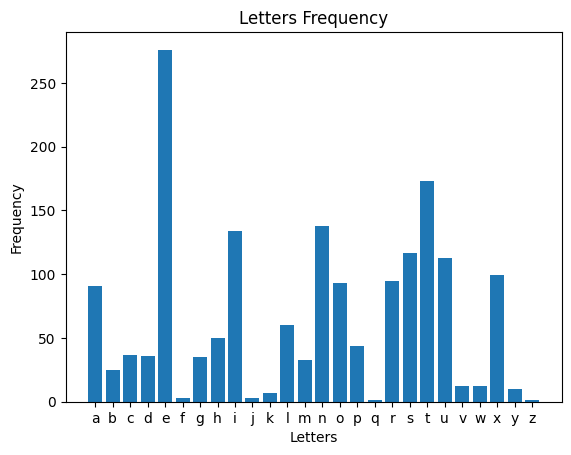

In [13]:
from matplotlib import pyplot

pyplot.title("Letters Frequency")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequency")
labels: list[str] = list(sorted_letters_dict.keys())
values: list[int] = list(sorted_letters_dict.values())
pyplot.bar(labels, values)